<a href="https://colab.research.google.com/github/AkashRamkaran/Automobile/blob/main/A_Ramkaran_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 1 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# 2 Load the dataset directly from GitHub
# Raw GitHub URL
url = 'https://raw.githubusercontent.com/AkashRamkaran/day2_data/main/Day2_Data.csv'

# Load into a DataFrame
df = pd.read_csv(url)

# Display first few rows
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Shape of data: (12795, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 n

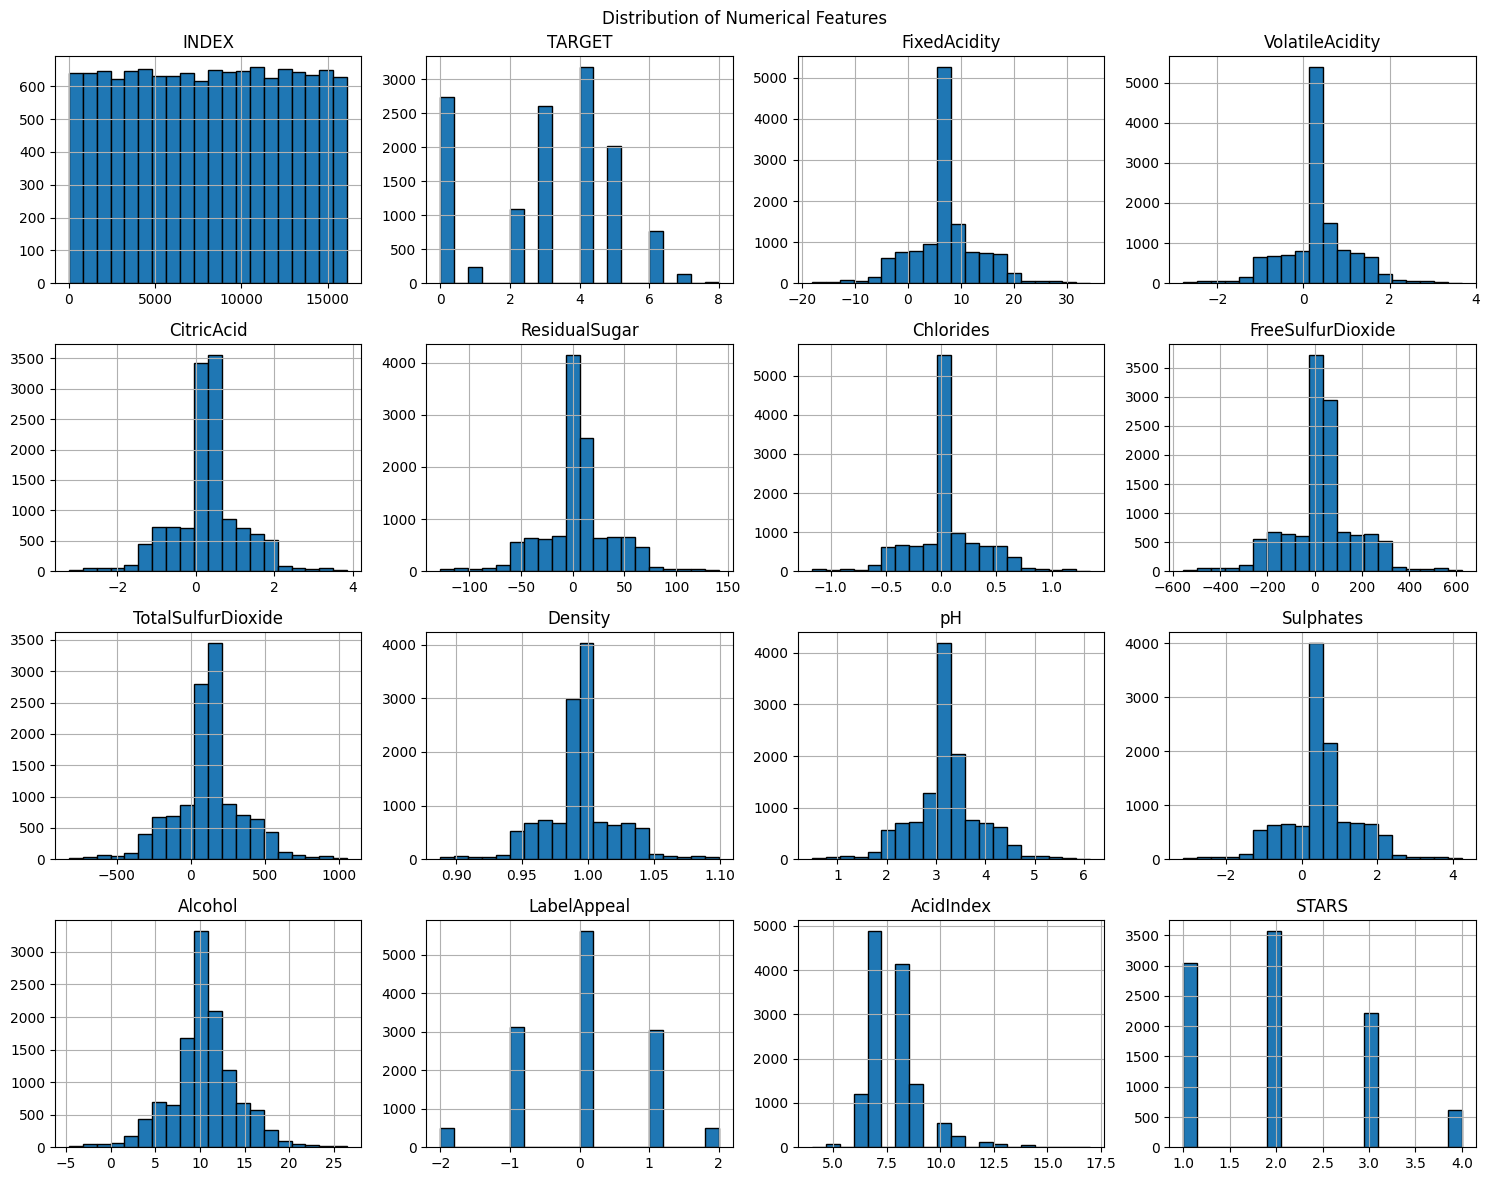

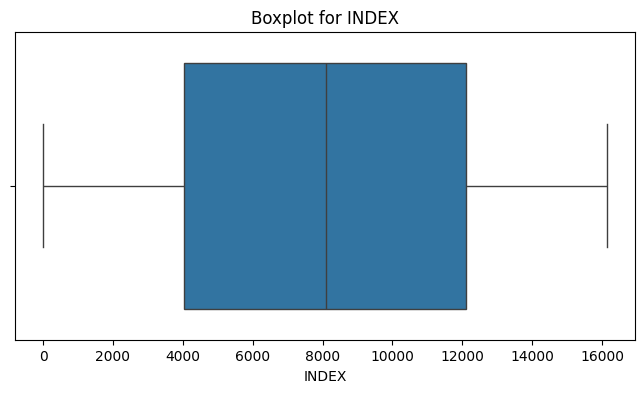

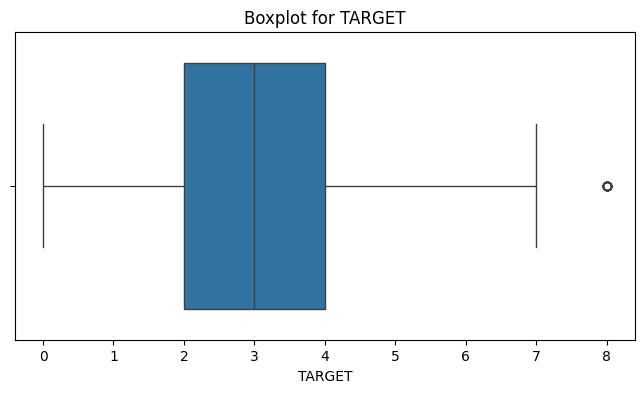

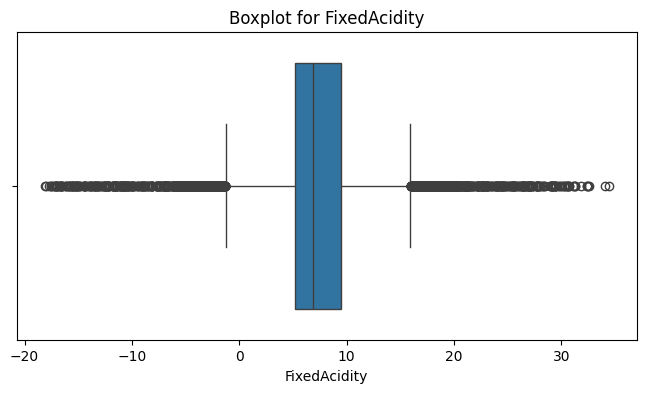

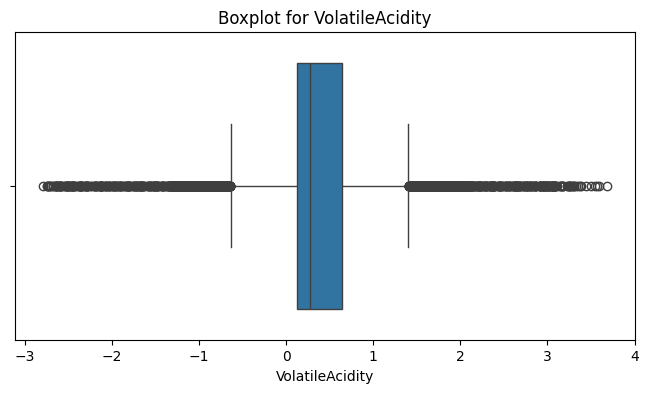

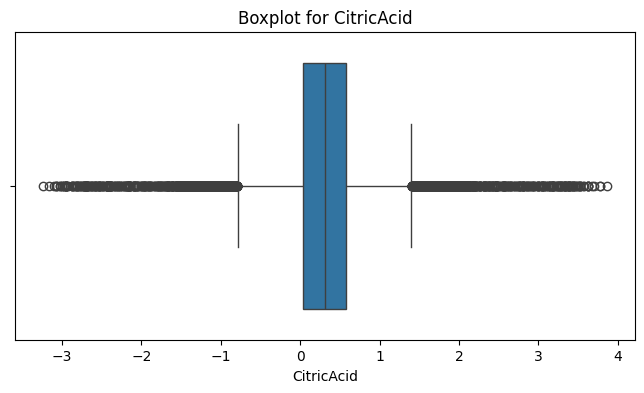

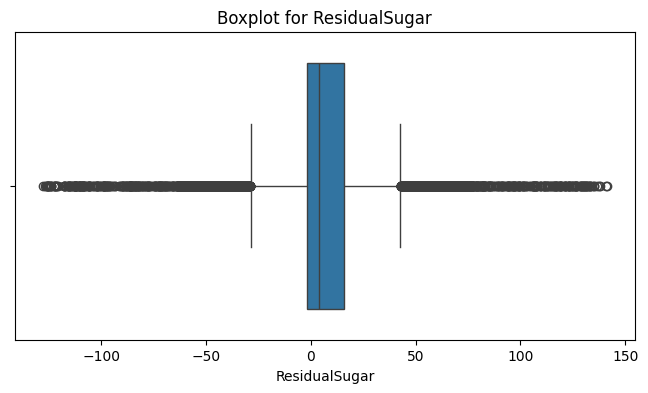

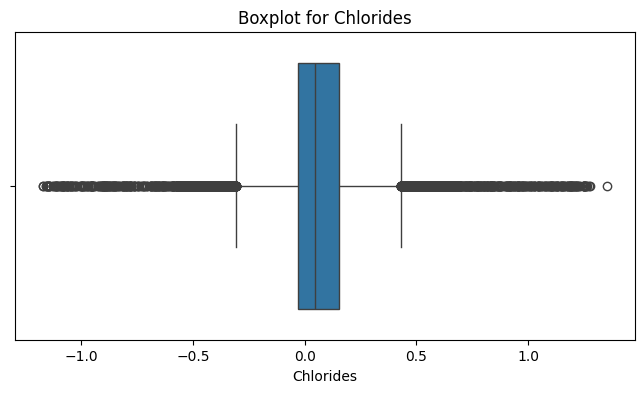

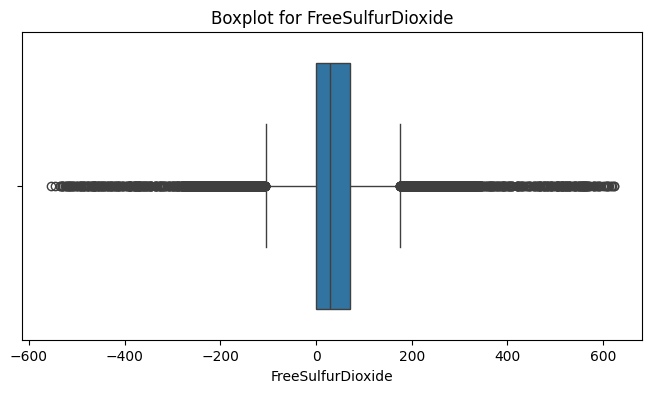

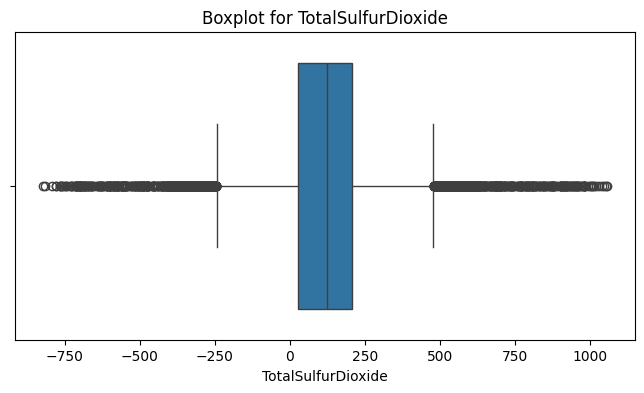

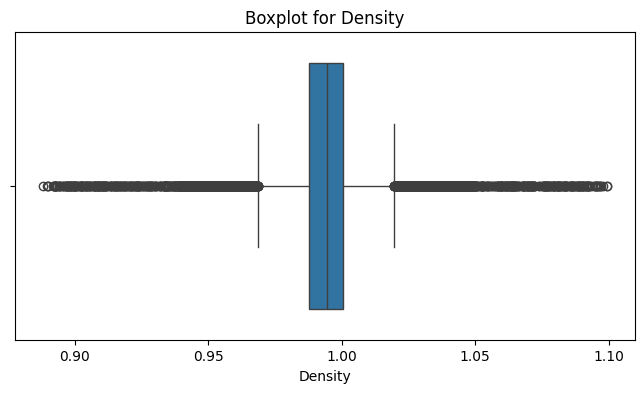

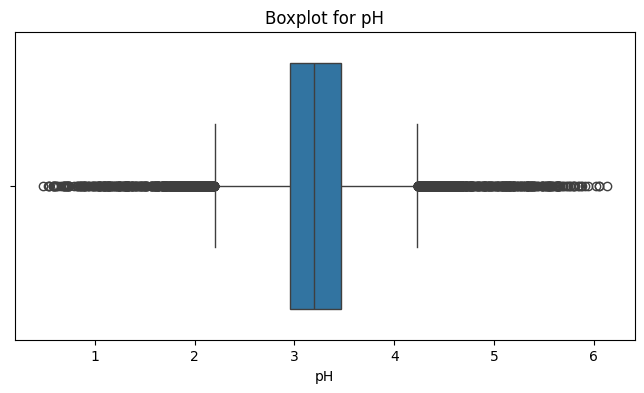

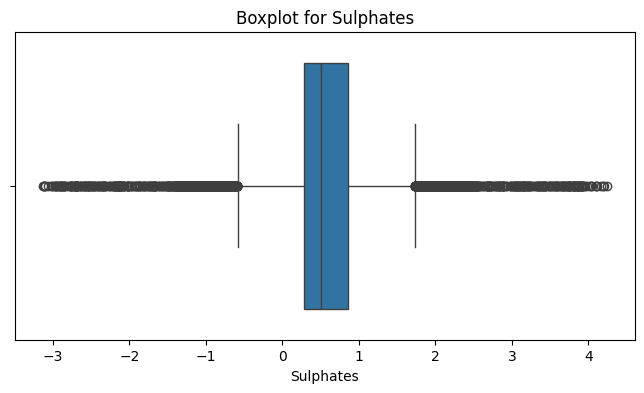

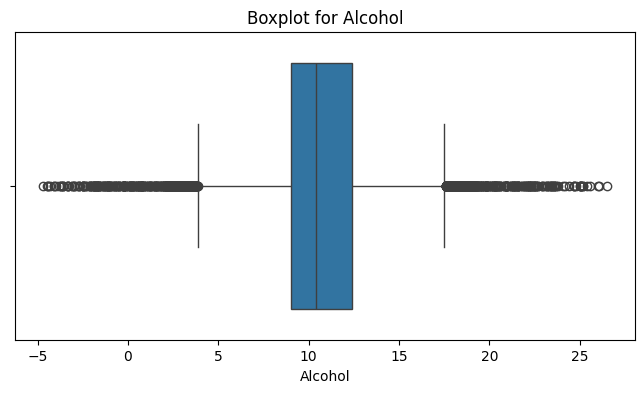

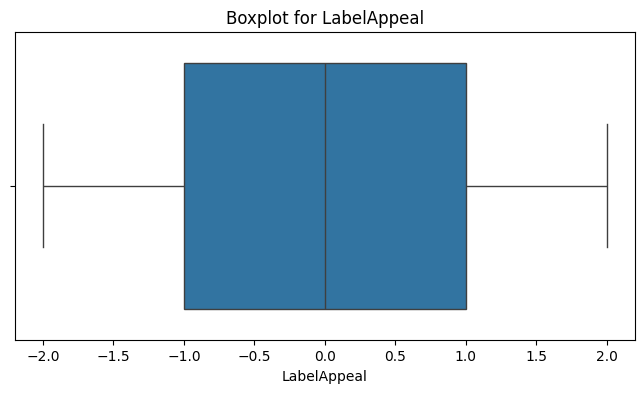

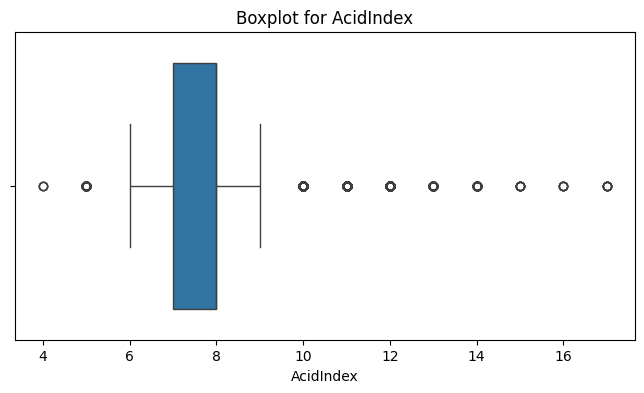

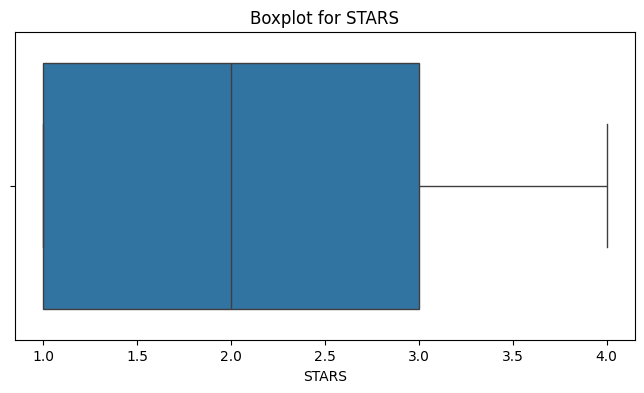

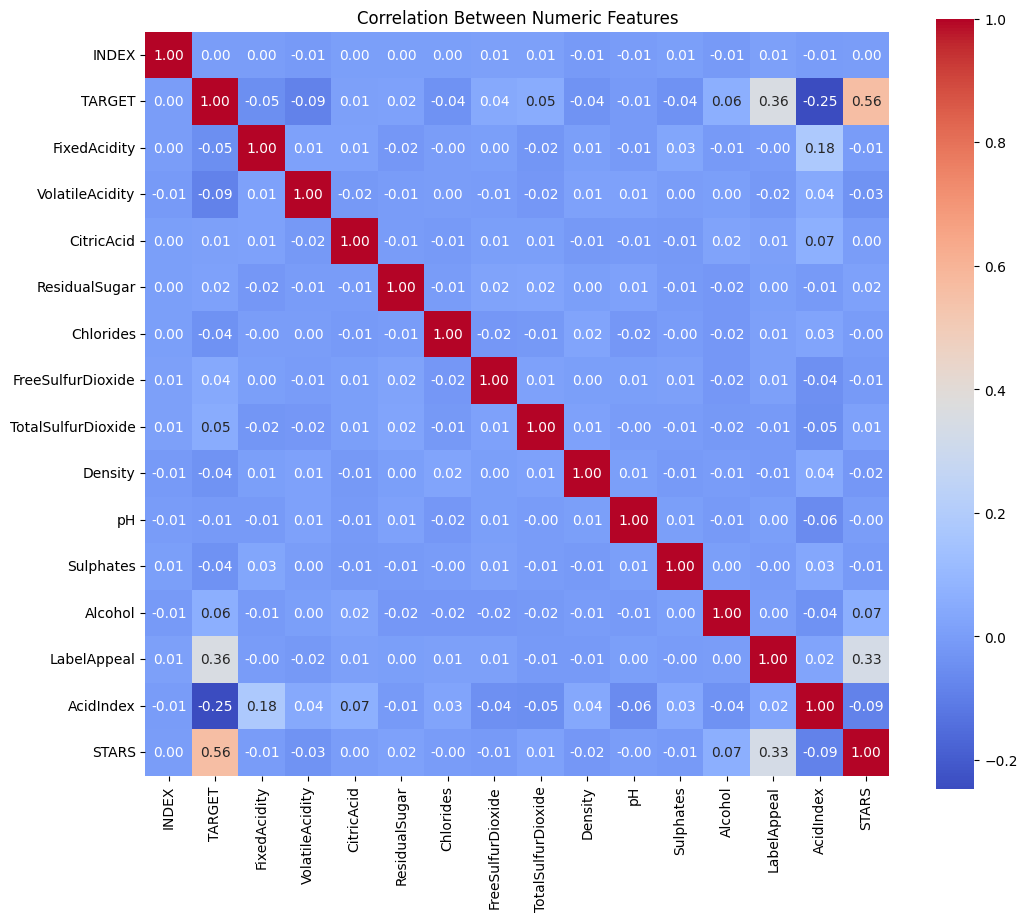

In [9]:
# Question 3 BASIC DATA OVERVIEW (EDA Start)
print("Shape of data:", df.shape)
df.info()

#SUMMARY STATISTICS
df.describe()
print()
# MISSING VALUES CHECK
print (df.isnull().sum(), "Missing Values")
#We Found missing values for 10 columns, we're going to imputate for those columns.
print ()
# UNIQUE VALUES CHECK FOR CATEGORICAL
df['STARS'].value_counts(dropna=False)

# DUPLICATE CHECK
df.duplicated().sum()


# HISTOGRAMS FOR NUMERICAL DATA
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

# BOXPLOTS FOR OUTLIERS
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
# CORRELATION HEATMAP
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Numeric Features")
plt.show()

Question 3 summary:

STARS has the most missing values: 3,359 missing entries

Sulphates, Alcohol, and TotalSulfurDioxide also have 600–1,200 missing values

Others like pH, Chlorides, and ResidualSugar have moderate gaps


Normal Distributions:

Alcohol, FixedAcidity, Density, Sulphates, and pH have bell-shaped distributions.

These are generally good for models like linear regression or KNN.

Skewed Distributions with Outliers:

ResidualSugar, FreeSulfurDioxide, TotalSulfurDioxide have long tails → right-skewed.

May benefit from log transformation or robust scaling.

Centered Distributions around 0:

VolatileAcidity, CitricAcid, Chlorides, etc. show very narrow peaks — some extreme outliers on both ends.

Discrete/Categorical Distributions:

LabelAppeal and STARS are clearly categorical, with spikes at specific values.


HEATMAP:

STARS vs. TARGET: 0.56

This is the strongest correlation in the dataset.

Means wines rated higher in TARGET tend to have higher expert STARS ratings.


STARS vs. LabelAppeal: 0.33

People likely rated wine better if the label was appealing.

Shows a moderately strong influence.

TARGET vs. LabelAppeal: 0.36

Similar logic — a label's look has a measurable influence on how wines are judge


Negative Correlations:
STARS vs. AcidIndex: -0.25

Higher acid levels may lead to lower STARS.

Possibly useful in cleaning or transformation.

AcidIndex vs. TARGET: -0.25

AcidIndex negatively impacts the TARGET score as well.

STARS vs. VolatileAcidity: -0.09

Slightly negative, might not be meaningful but still worth observing.




In [10]:
#4 DATA PREPARATION TASKS (Q4)


columns_to_impute = [
    'ResidualSugar',
    'Chlorides',
    'FreeSulfurDioxide',
    'TotalSulfurDioxide',
    'pH',
    'Sulphates',
    'Alcohol'
]
#Although we have 10 columns that are missing values, 3 are not included in this array because they are
#engineered columns. Meaning that the value of those columns depends on a column in this array so we
#should not imputate it directly but rather re-calculate.
for col in columns_to_impute:
    df[col] = df[col].fillna(df[col].median())
#Fill empty values with the median of each column.

# Recalculate log and engineered features
df['ResidualSugar'] = df['ResidualSugar'].fillna(df['ResidualSugar'].median())
df = df[df['ResidualSugar'] >= 0]
df['ResidualSugar_log'] = np.log1p(df['ResidualSugar'])
df['SulfurPerAlcohol'] = (df['FreeSulfurDioxide'] + df['TotalSulfurDioxide']) / (df['Alcohol'] + 0.01)
df['ResidualSugar_clean'] = df['ResidualSugar']
df = df.dropna()
df
#Made three new variables. The log of the residual sugar, the cleaned up version of residual sugar,
#and sulfer concentration in alcohol.
#Check to see if there are no more empty values.
print ()
print (df.isnull().sum(), "Missing Values")

#We should not clean this directly because these variables comes from residualSugar.
#We will just use functions to get their new values.



INDEX                  0
TARGET                 0
FixedAcidity           0
VolatileAcidity        0
CitricAcid             0
ResidualSugar          0
Chlorides              0
FreeSulfurDioxide      0
TotalSulfurDioxide     0
Density                0
pH                     0
Sulphates              0
Alcohol                0
LabelAppeal            0
AcidIndex              0
STARS                  0
ResidualSugar_log      0
SulfurPerAlcohol       0
ResidualSugar_clean    0
dtype: int64 Missing Values


<ipython-input-10-547275456>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ResidualSugar_log'] = np.log1p(df['ResidualSugar'])
<ipython-input-10-547275456>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SulfurPerAlcohol'] = (df['FreeSulfurDioxide'] + df['TotalSulfurDioxide']) / (df['Alcohol'] + 0.01)
<ipython-input-10-547275456>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Shape of data: (7136, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 7136 entries, 0 to 12794
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INDEX                7136 non-null   int64  
 1   TARGET               7136 non-null   int64  
 2   FixedAcidity         7136 non-null   float64
 3   VolatileAcidity      7136 non-null   float64
 4   CitricAcid           7136 non-null   float64
 5   ResidualSugar        7136 non-null   float64
 6   Chlorides            7136 non-null   float64
 7   FreeSulfurDioxide    7136 non-null   float64
 8   TotalSulfurDioxide   7136 non-null   float64
 9   Density              7136 non-null   float64
 10  pH                   7136 non-null   float64
 11  Sulphates            7136 non-null   float64
 12  Alcohol              7136 non-null   float64
 13  LabelAppeal          7136 non-null   int64  
 14  AcidIndex            7136 non-null   int64  
 15  STARS           

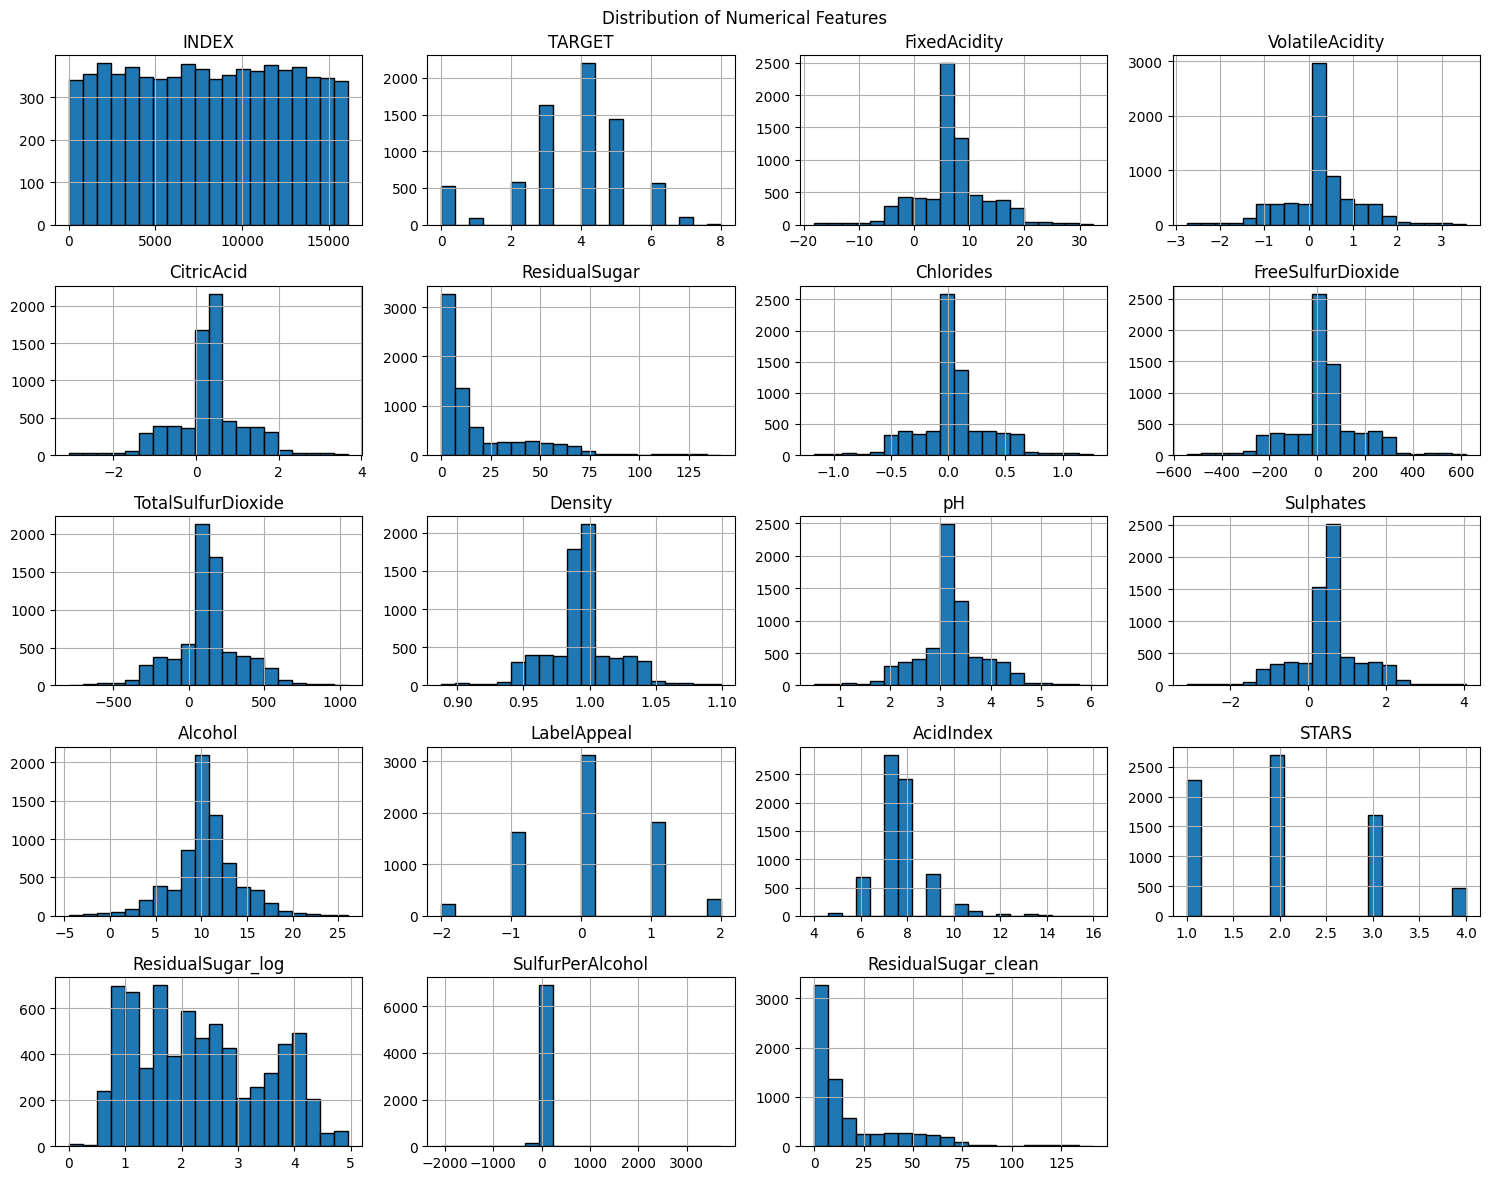

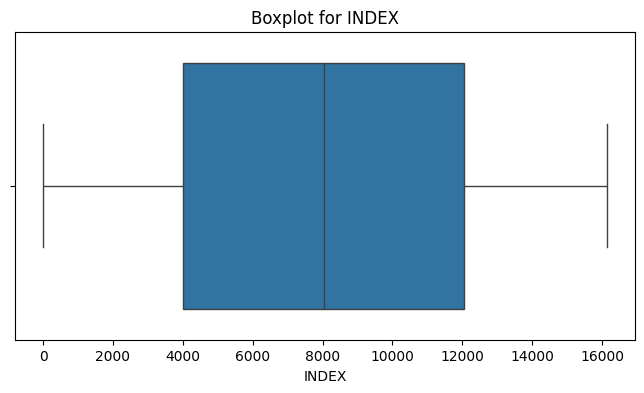

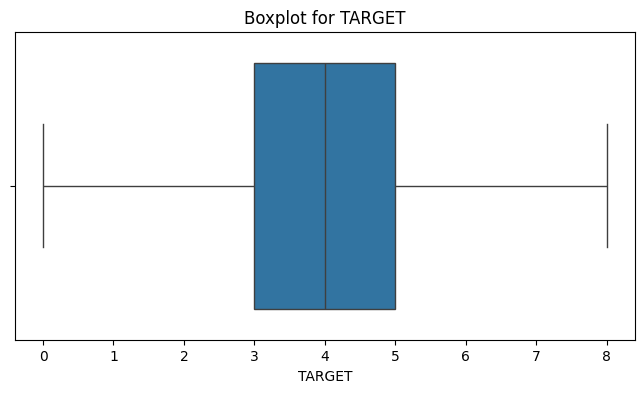

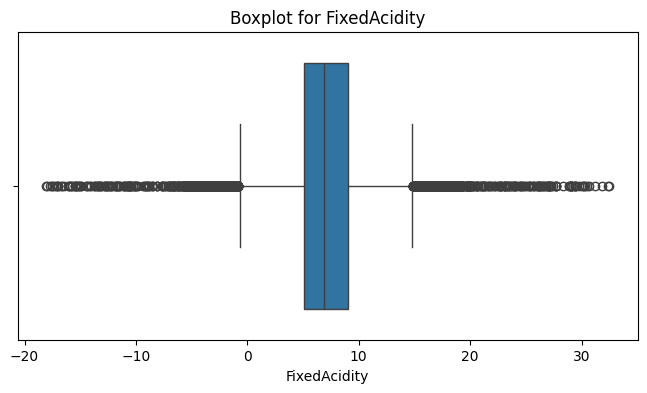

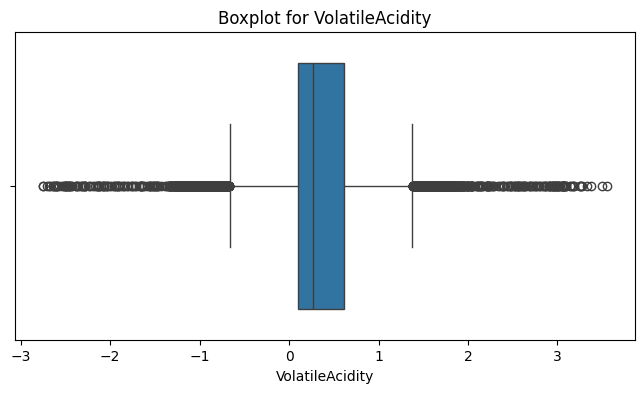

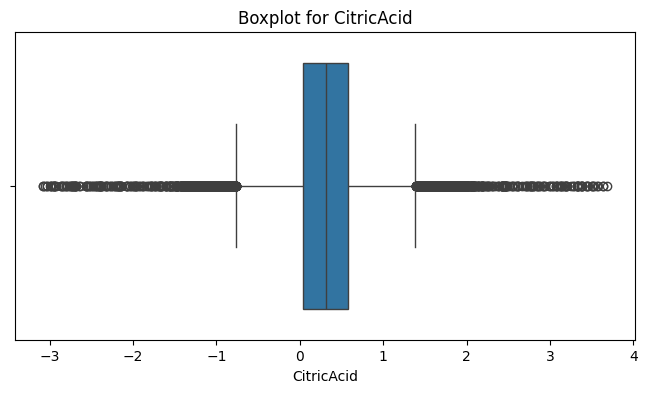

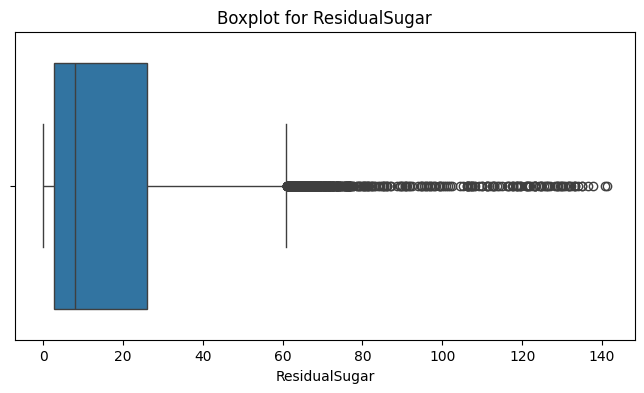

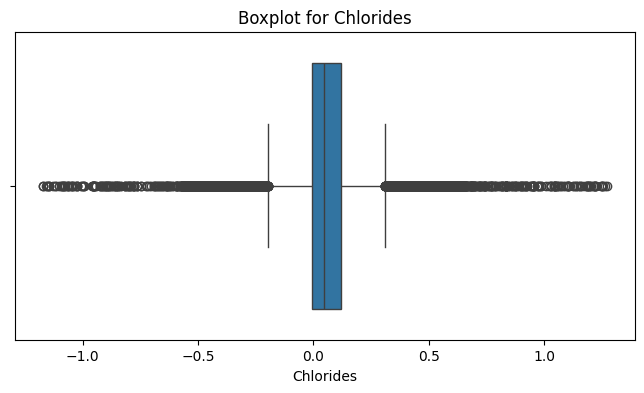

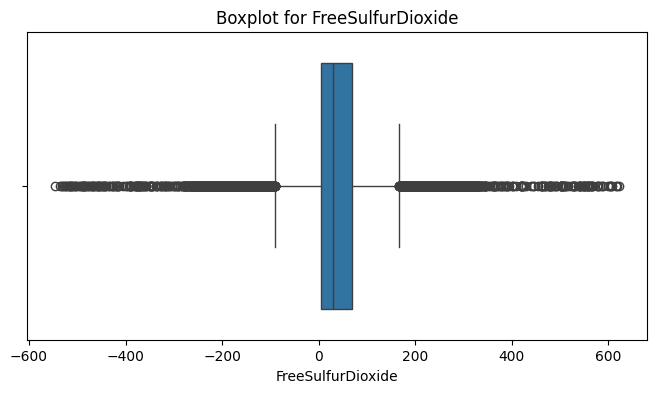

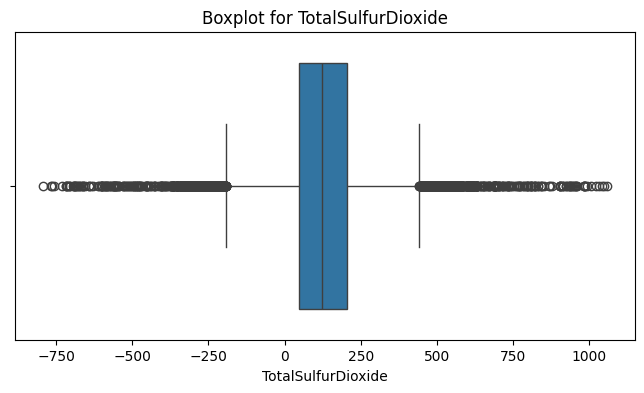

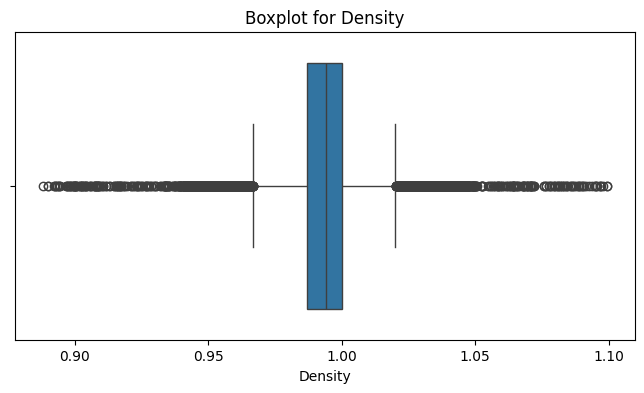

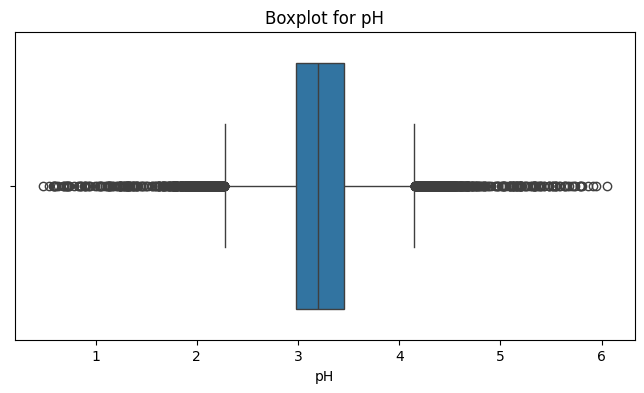

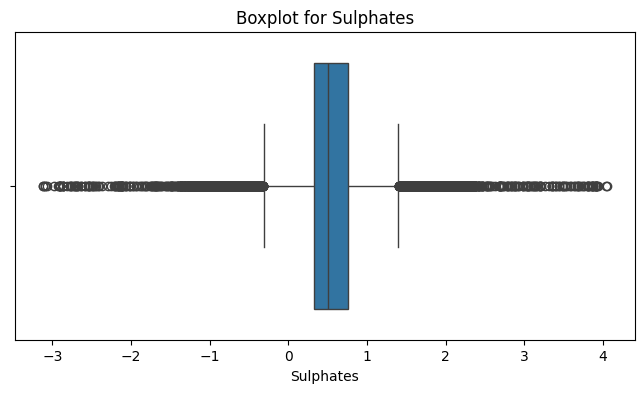

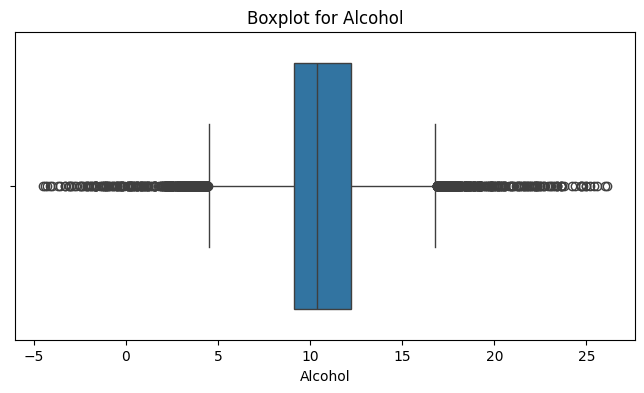

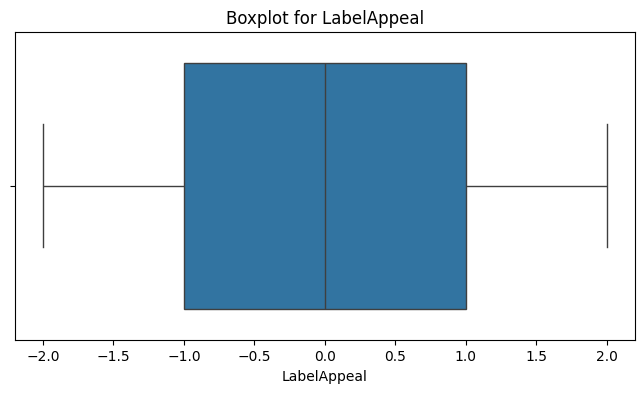

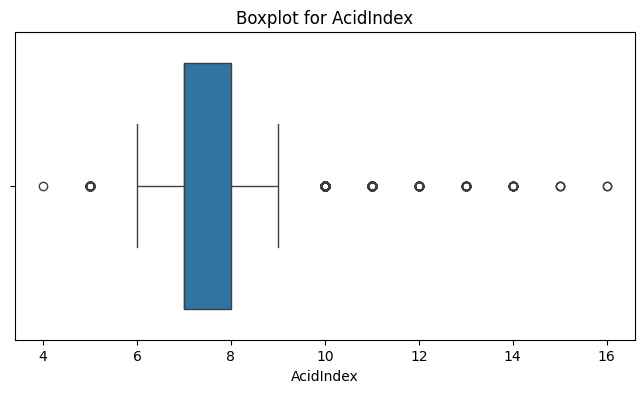

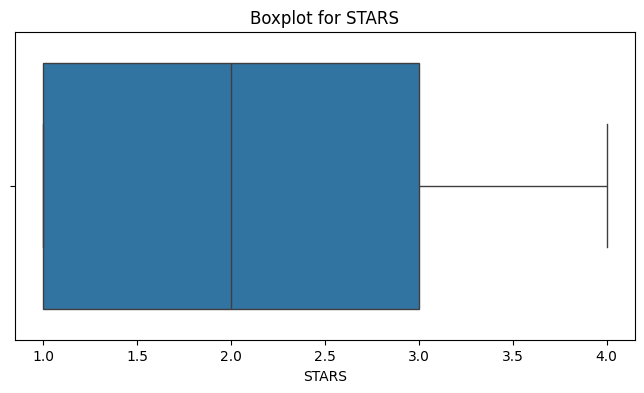

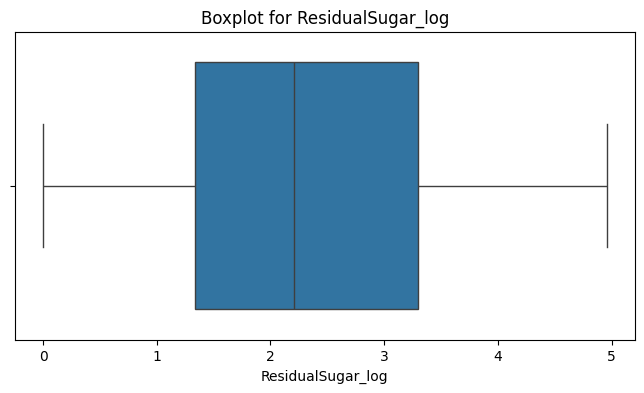

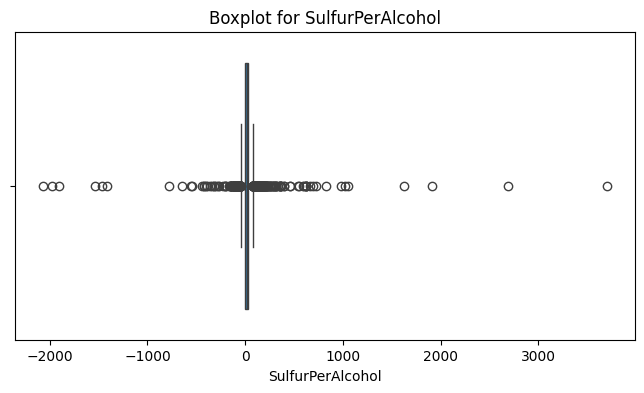

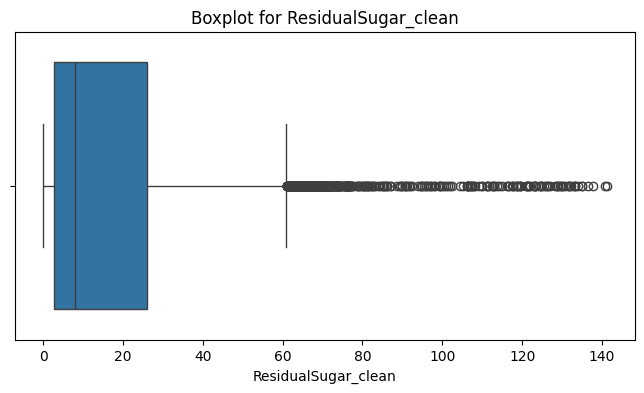

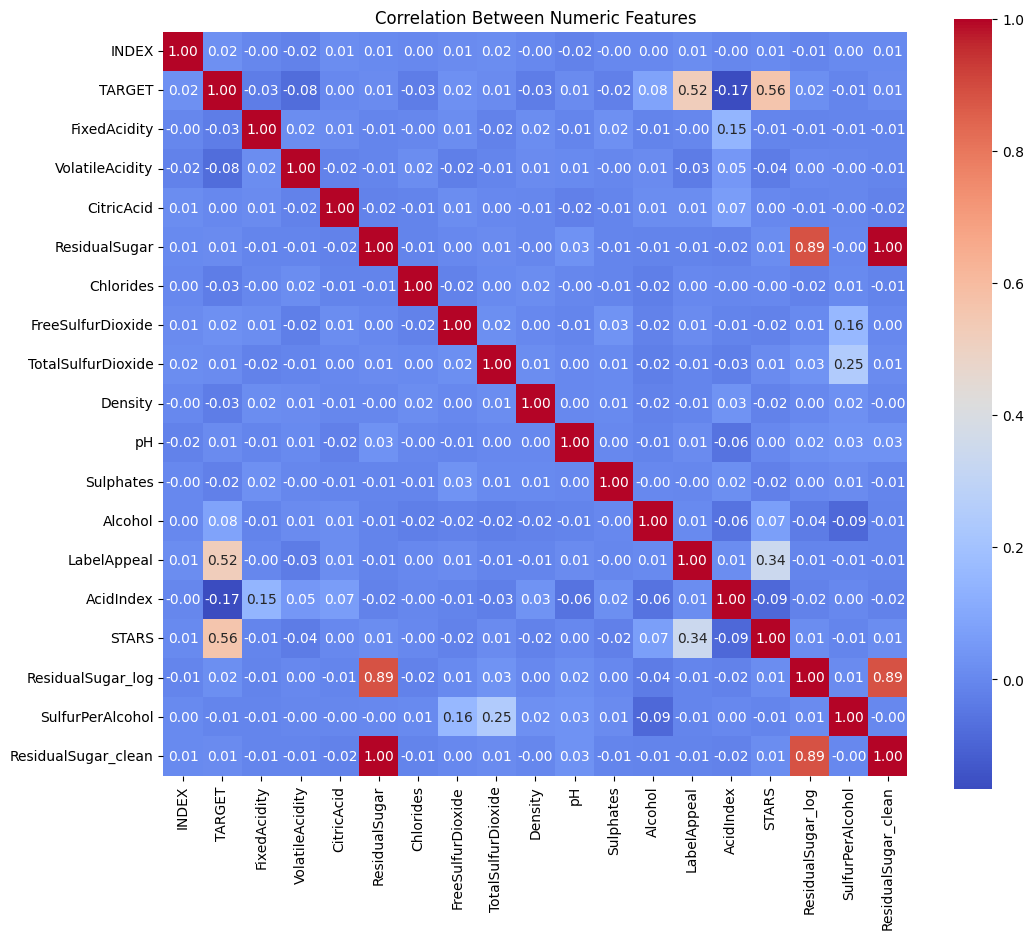

In [11]:
#Question 5 Post cleaning EDA analysis


print("Shape of data:", df.shape)
df.info()

#SUMMARY STATISTICS (Q5)
df.describe()
print()
# MISSING VALUES CHECK
print (df.isnull().sum(), "Missing Values")
#We Found missing values for 10 columns, we're going to imputate for those columns.
print ()
# UNIQUE VALUES CHECK FOR CATEGORICAL (Q5)
df['STARS'].value_counts(dropna=False)

# DUPLICATE CHECK (Q5)
df.duplicated().sum()


# HISTOGRAMS FOR NUMERICAL DATA (Q5)
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

# BOXPLOTS FOR OUTLIERS (Q5)
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
# CORRELATION HEATMAP (Q5)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Numeric Features")
plt.show()


#We get a better representation of the data that is provided to us, and potentially get a more precise insight
#With the handling of missing data

concluasion:

In this analysis, we performed exploratory data analysis (EDA) on a wine dataset to assess data quality, variable distributions, and relationships between key features. We found that several variables, such as ResidualSugar, Sulphates, and Alcohol, contained missing values, with the STARS column showing the most significant data gaps. These will require careful imputation strategies before modeling.

Distribution plots revealed that while some variables, like Alcohol and FixedAcidity, follow approximately normal distributions, others such as ResidualSugar and TotalSulfurDioxide are heavily skewed, indicating the need for transformations like log scaling.

The correlation heatmap highlighted that STARS, the expert wine rating, is moderately correlated with TARGET (0.56) and LabelAppeal (0.33), suggesting these may be strong predictors in future models. Conversely, AcidIndex showed a negative correlation with STARS (-0.25), indicating that higher acid levels may negatively influence wine ratings.

Overall, the dataset is well-suited for predictive modeling after handling missing values and scaling skewed features. The relationships found provide a strong foundation for building models that can predict expert ratings based on chemical properties and consumer perception metrics like label appeal.